In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr
import cv2



## ***PART 1***

/tmp/ipykernel_45459/842601911.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_1 = imageio.imread('images/CR7.png')
/tmp/ipykernel_45459/842601911.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_2 = imageio.imread('images/cat.png')
/tmp/ipykernel_45459/842601911.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_3 = imageio.imread('images/baymax.png')
/tmp/ipyke

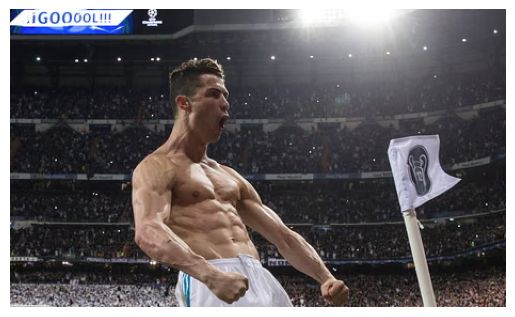

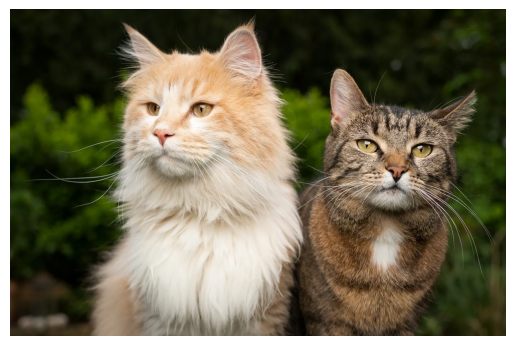

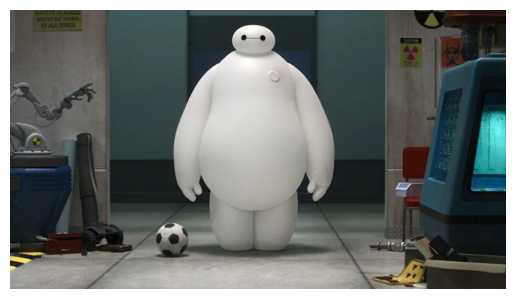

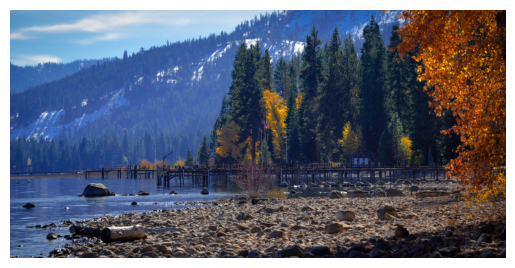

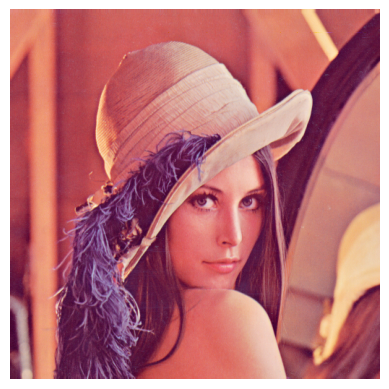

In [2]:
#Import images
img_1 = imageio.imread('images/CR7.png')
img_2 = imageio.imread('images/cat.png')
img_3 = imageio.imread('images/baymax.png')
img_4 = imageio.imread('images/lake.png')
img_5 = imageio.imread('images/Lenna.png')

images = [img_1, img_2, img_3, img_4, img_5]

#Plot images
plt.imshow(img_1)
plt.axis('off')
plt.show()

plt.imshow(img_2)
plt.axis('off')
plt.show()

plt.imshow(img_3)
plt.axis('off')
plt.show()

plt.imshow(img_4)
plt.axis('off')
plt.show()

plt.imshow(img_5)
plt.axis('off')
plt.show()

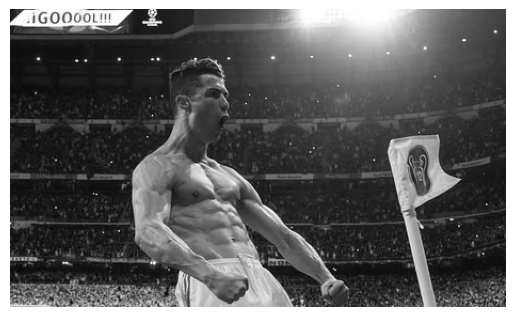

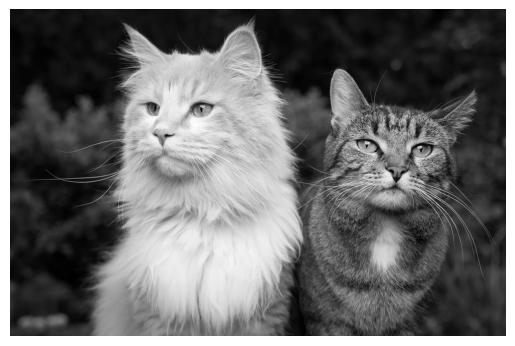

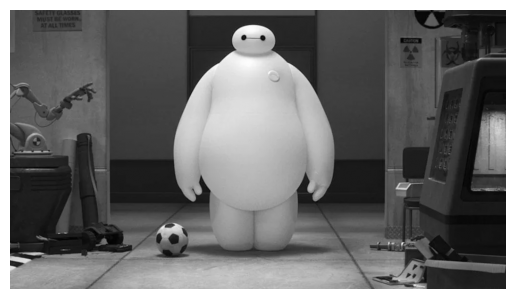

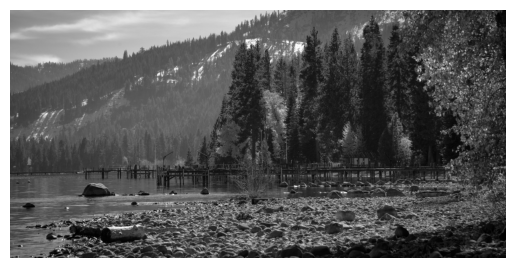

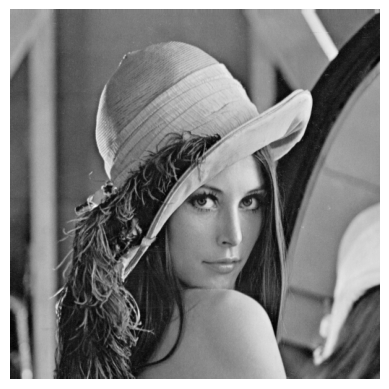

In [3]:
#Implement the grey function and save all the grays in an array
gray_images = []

def rgb_to_grayscale(rgb_image):
    gray_img = 0.3*rgb_image[:,:,0] + 0.59*rgb_image[:,:,1] + 0.11*rgb_image[:,:,2]
    return gray_img.astype(np.uint8)

for i, img in enumerate(images):
    gray_image = rgb_to_grayscale(img)
    gray_images.append(gray_image)
    plt.imshow(gray_image, cmap='gray')
    plt.axis('off')
    plt.show()

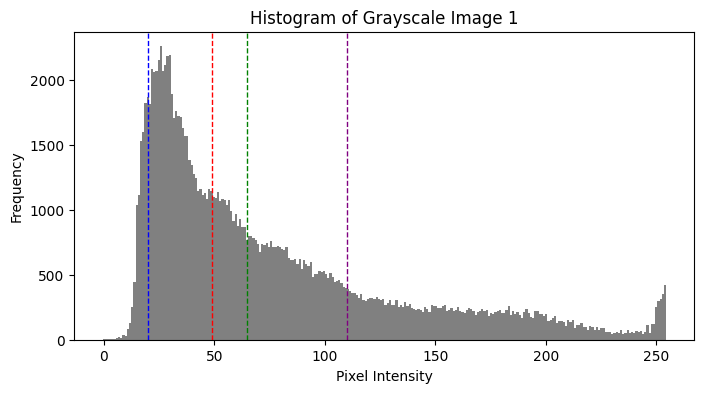

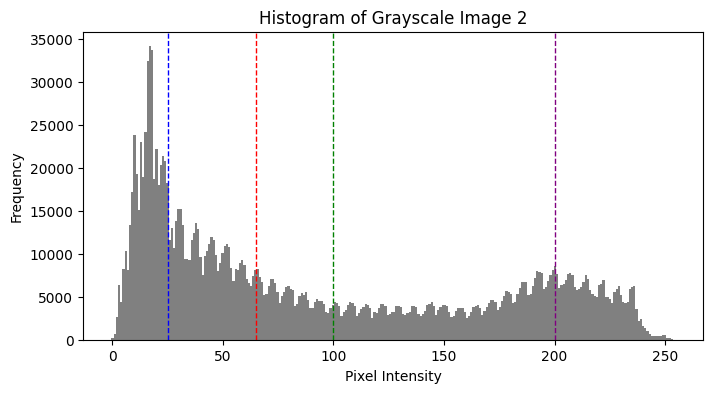

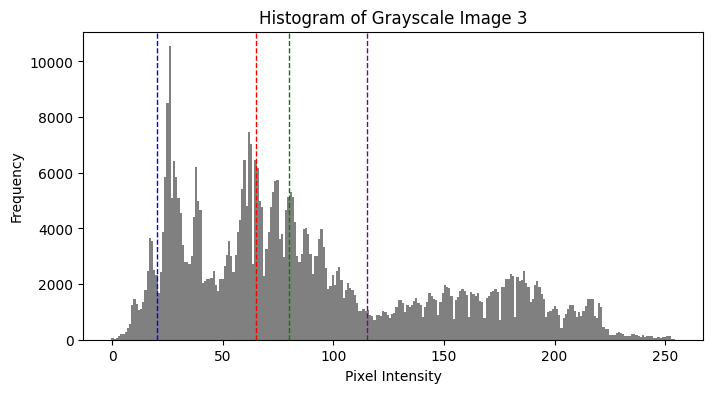

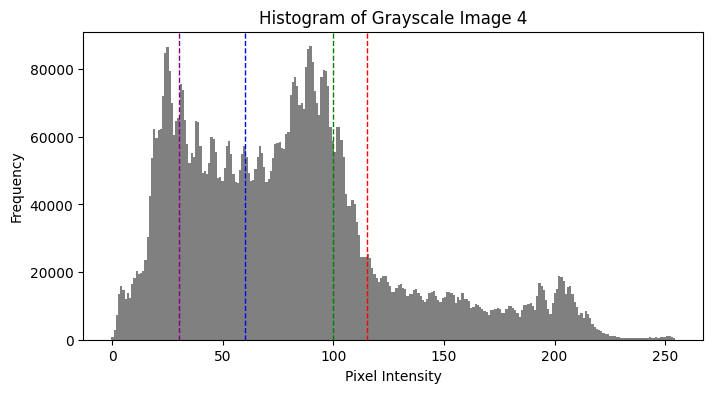

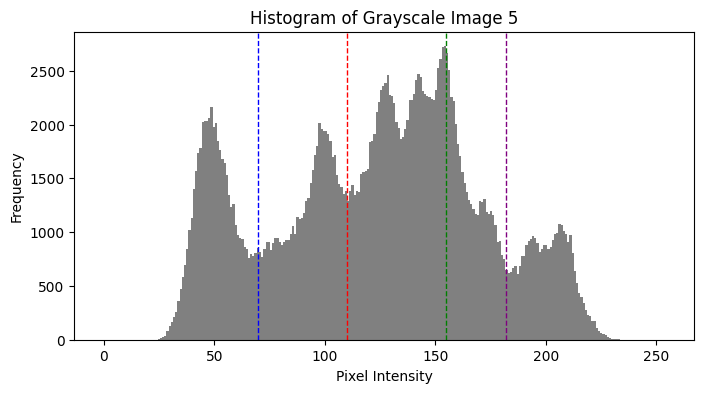

In [4]:
#Plot all histograms with 4 different thresholds each
histograms = []
bins_list = []

for i, gray_image in enumerate(gray_images):
    hist, bins = np.histogram(gray_image.flatten(), bins=256, range=[0,255])
    histograms.append(hist)
    bins_list.append(bins)

Thresholds = [[49, 20, 65, 110],
              [65, 25, 100, 200],
              [65, 20, 80, 115],
              [115, 60, 100, 30],
              [110, 70, 155, 182]]

for i, (hist, bins) in enumerate(zip(histograms, bins_list)):
    plt.figure(figsize=(8,4))
    plt.bar(bins[:-1], hist, width=1, color='gray')
    plt.title(f'Histogram of Grayscale Image {i+1}')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.axvline(x=Thresholds[i][0], color='red', linestyle='dashed', linewidth=1)
    plt.axvline(x=Thresholds[i][1], color='blue', linestyle='dashed', linewidth=1)
    plt.axvline(x=Thresholds[i][2], color='green', linestyle='dashed', linewidth=1)
    plt.axvline(x=Thresholds[i][3], color='purple', linestyle='dashed', linewidth=1)
    plt.show()

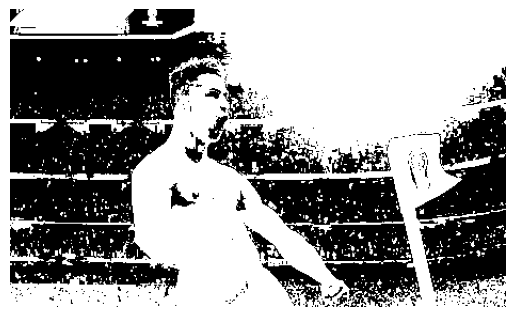

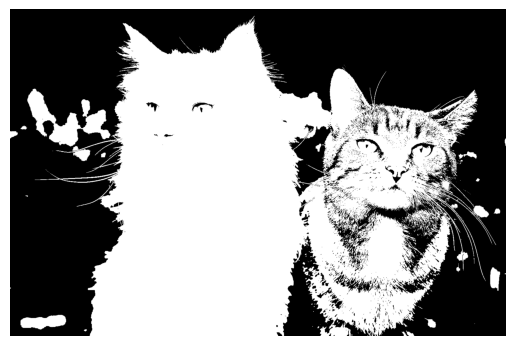

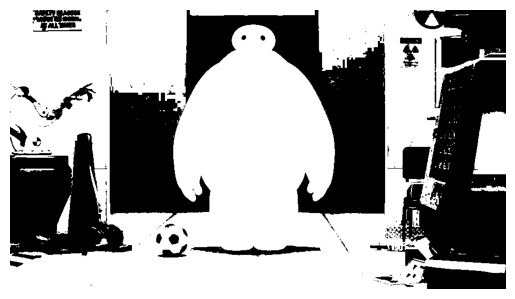

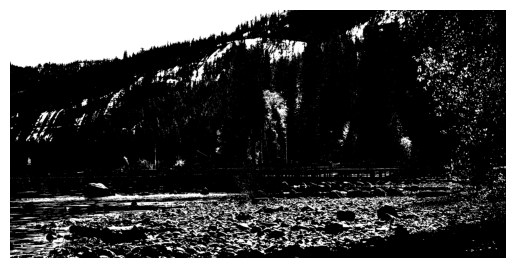

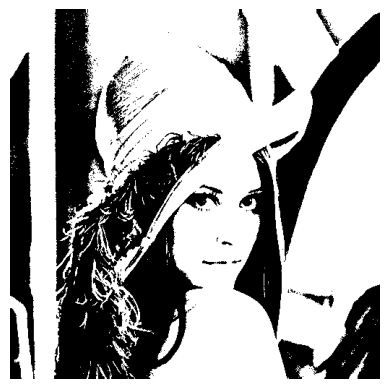

In [5]:
#Plot binary images using the first and "Best" threshold of each image
for i, gray_image in enumerate(gray_images):
    threshold = Thresholds[i][0]  
    binary_image = (gray_image > threshold).astype(np.uint8) * 255
    plt.imshow(binary_image, cmap='gray')
    plt.axis('off')
    plt.show()


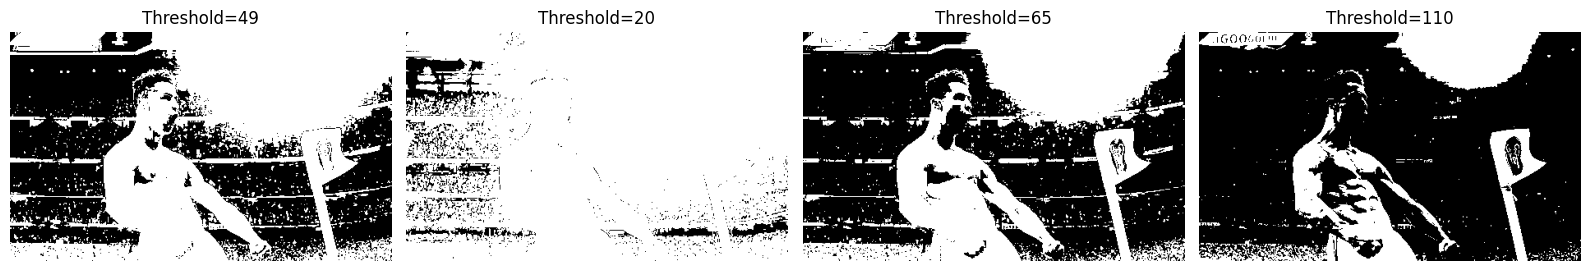

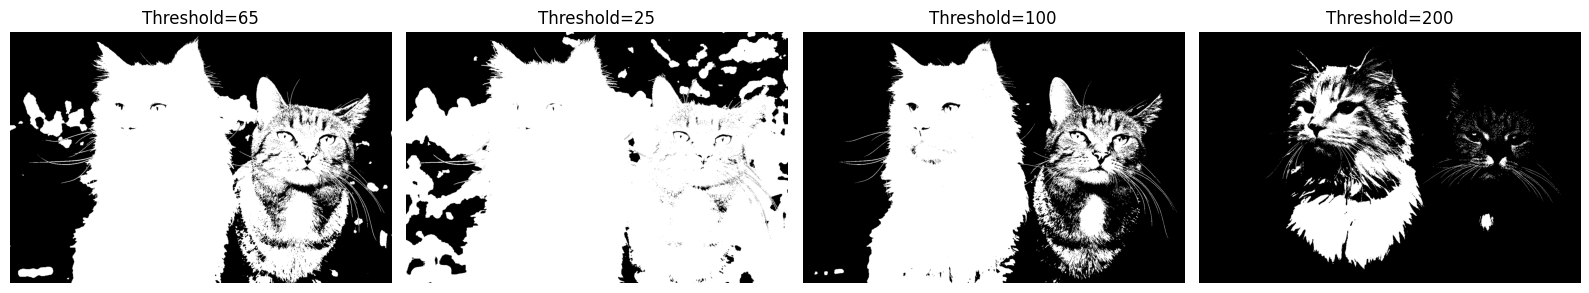

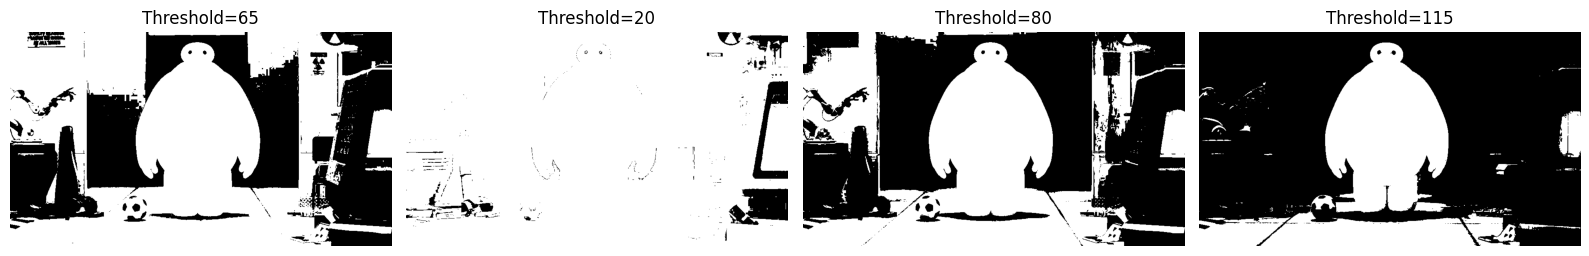

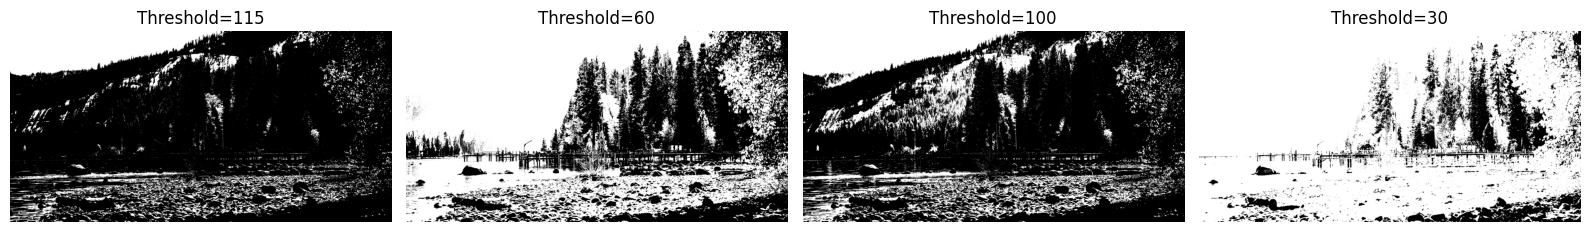

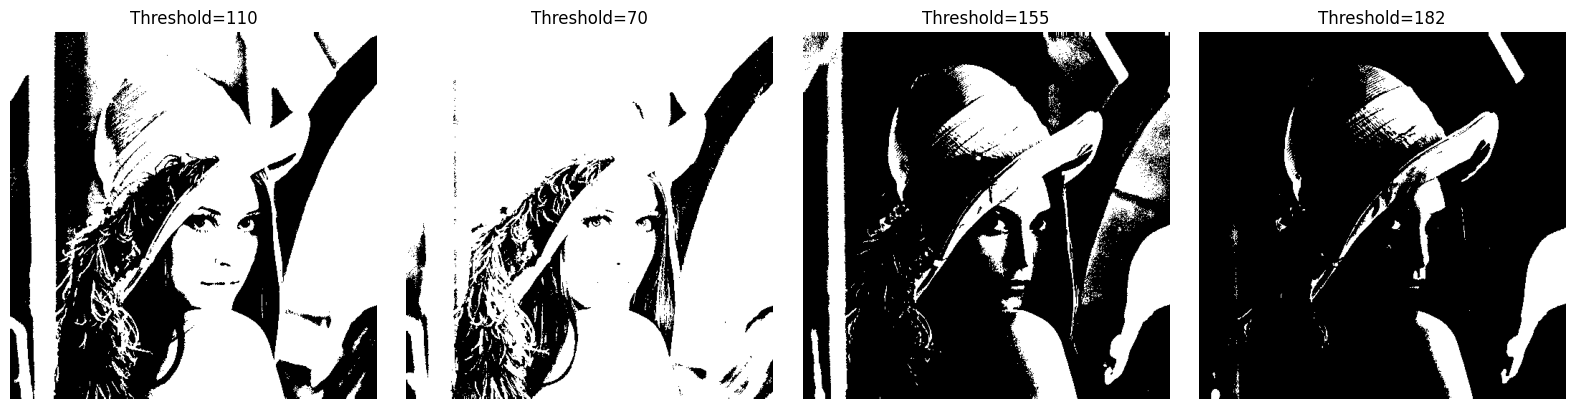

In [6]:
#Compare all binary images for all thresholds
all_binary_images = []

for i, gray_image in enumerate(gray_images):
    thresholds = Thresholds[i]
    binary_list = []  
    
    for threshold in thresholds:
        binary_image = (gray_image > threshold).astype(np.uint8) * 255
        binary_list.append(binary_image)

    all_binary_images.append(binary_list)

    plt.figure(figsize=(16, 4))
    for j, threshold in enumerate(thresholds):
        plt.subplot(1, len(thresholds), j+1)
        plt.imshow(binary_list[j], cmap='gray')
        plt.title(f'Threshold={threshold}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

In [7]:
#Calculate the number of black and white pixels
for i, img in enumerate(all_binary_images):
    print('--------------------------------')
    for j,binary_img in enumerate(img):
        white_count = np.sum(binary_img == 255)
        black_count = np.sum(binary_img == 0)
        total_pixels = binary_img.size
        
        print(f'Image {i+1}, Threshold {Thresholds[i][j]}:')
        print(f'  White pixels: {white_count} ({(white_count/total_pixels)*100:.2f}%)')
        print(f'  Black pixels: {black_count} ({(black_count/total_pixels)*100:.2f}%)\n')

--------------------------------
Image 1, Threshold 49:
  White pixels: 72055 (55.54%)
  Black pixels: 57680 (44.46%)

Image 1, Threshold 20:
  White pixels: 119725 (92.28%)
  Black pixels: 10010 (7.72%)

Image 1, Threshold 65:
  White pixels: 56241 (43.35%)
  Black pixels: 73494 (56.65%)

Image 1, Threshold 110:
  White pixels: 28835 (22.23%)
  Black pixels: 100900 (77.77%)

--------------------------------
Image 2, Threshold 65:
  White pixels: 844286 (50.06%)
  Black pixels: 842114 (49.94%)

Image 2, Threshold 25:
  White pixels: 1250902 (74.18%)
  Black pixels: 435498 (25.82%)

Image 2, Threshold 100:
  White pixels: 662108 (39.26%)
  Black pixels: 1024292 (60.74%)

Image 2, Threshold 200:
  White pixels: 241034 (14.29%)
  Black pixels: 1445366 (85.71%)

--------------------------------
Image 3, Threshold 65:
  White pixels: 310305 (59.86%)
  Black pixels: 208095 (40.14%)

Image 3, Threshold 20:
  White pixels: 492692 (95.04%)
  Black pixels: 25708 (4.96%)

Image 3, Threshold 80:
 

## ***PART 2***

/tmp/ipykernel_45459/1078178563.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_gaussian_noise_peppers = imageio.imread('images/gaussian_noise_peppers.png')
/tmp/ipykernel_45459/1078178563.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_peppers = imageio.imread('images/peppers.png')
/tmp/ipykernel_45459/1078178563.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  i

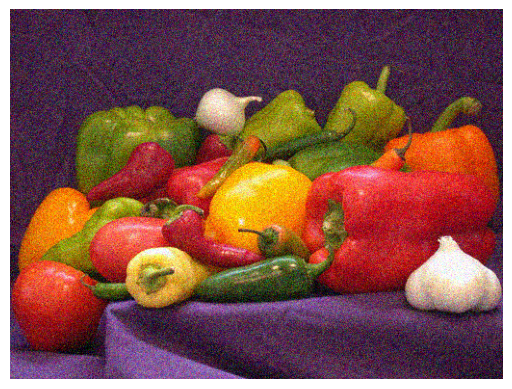

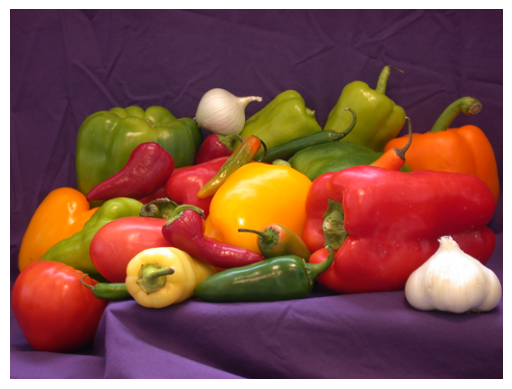

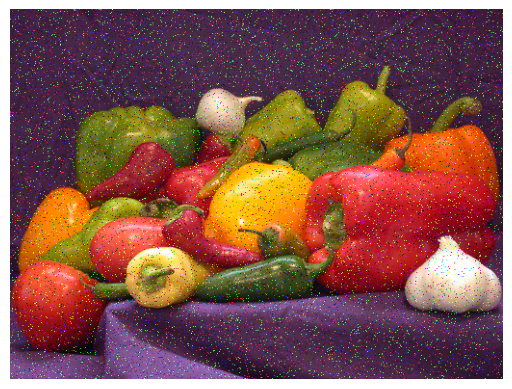

In [8]:
#Import the two noisy and the one normal image
img_gaussian_noise_peppers = imageio.imread('images/gaussian_noise_peppers.png')
img_peppers = imageio.imread('images/peppers.png')
img_saltandpepper_noise_peppers = imageio.imread('images/saltandpepper_noise_peppers.png')

plt.imshow(img_gaussian_noise_peppers)
plt.axis('off')
plt.show()

plt.imshow(img_peppers)
plt.axis('off')
plt.show()

plt.imshow(img_saltandpepper_noise_peppers)
plt.axis('off')
plt.show()

img_gaussian_noise_peppers_grey = rgb_to_grayscale(img_gaussian_noise_peppers)
img_peppers_grey = rgb_to_grayscale(img_peppers)
img_saltandpepper_noise_peppers_grey = rgb_to_grayscale(img_saltandpepper_noise_peppers)

In [9]:
#Implement the gausian filter of size 7 and variuance 2
def gaussian_kernel(size=7, sigma=2):
    ax = np.arange(-(size // 2), size // 2 + 1)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    kernel = kernel / np.sum(kernel)  # normalize
    return kernel

#implement the box filter of size 7
def box_kernel(size=7):
    kernel = np.ones((size, size), dtype=np.float32)
    kernel = kernel / np.sum(kernel)
    return kernel

box_k = box_kernel(size=7)
print("Box Kernel:\n", box_k)

gauss_kernel = gaussian_kernel(size=7, sigma=8)
print("Gaussian Kernel:\n", gauss_kernel)


Box Kernel:
 [[0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]]
Gaussian Kernel:
 [[0.0188607  0.01961203 0.02007712 0.02023458 0.02007712 0.01961203
  0.0188607 ]
 [0.01961203 0.02039328 0.0208769  0.02104064 0.0208769  0.02039328
  0.01961203]
 [0.02007712 0.0208769  0.02137198 0.0215396  0.02137198 0.0208769
  0.02007712]
 [0.02023458 0.02104064 0.0215396  0.02170854 0.0215396  0.02104064
  0.02023458]
 [0.02007712 0.0208769  0.02137198 0.0215396  0.02137198 0.0208769


In [10]:
#This function does the convolution for grayscale images with a kernel
def convolve2d_for_gray(image, kernel):
    img_h, img_w = image.shape
    k_h, k_w = kernel.shape
    pad_h, pad_w = k_h // 2, k_w // 2

    #The first pixel is not at (0,0) but at (pad_h, pad_w) 
    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='edge') 

    output = np.zeros_like(image, dtype=np.float32)

    # Convolution
    for i in range(img_h):
        for j in range(img_w):
            region = padded[i:i+k_h, j:j+k_w]
            if(np.sum(region * kernel) > 255):
                output[i, j] = 255
            elif(np.sum(region * kernel) < 0):
                output[i, j] = 0
            else:
                output[i, j] = np.sum(region * kernel)

    return output.astype(np.uint8)



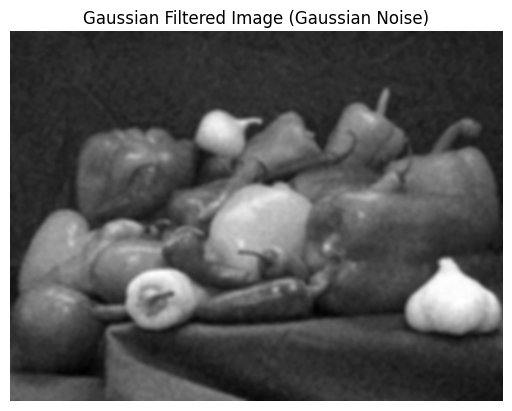

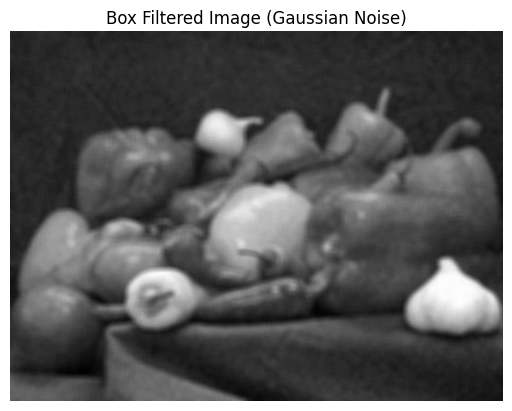

In [11]:
#Aplling filter to the gaussain nmoise image
gauss_kernel = gaussian_kernel(size=7, sigma=2)
gaussian_filtered = convolve2d_for_gray(img_gaussian_noise_peppers_grey, gauss_kernel)
box_k = box_kernel(size=7)
box_filtered = convolve2d_for_gray(img_gaussian_noise_peppers_grey, box_k)

plt.imshow(gaussian_filtered, cmap='gray')
plt.axis('off')
plt.title('Gaussian Filtered Image (Gaussian Noise)')
plt.show()

plt.imshow(box_filtered, cmap='gray')
plt.axis('off')
plt.title('Box Filtered Image (Gaussian Noise)')
plt.show()

In [12]:
#Compare PSNR scores
psnr_value_gaussian = psnr(img_peppers_grey, gaussian_filtered, data_range=255)
psnr_value_box = psnr(img_peppers_grey, box_filtered, data_range=255)

print(f'PSNR between original and Gaussian filtered image: {psnr_value_gaussian:.2f} dB')
print(f'PSNR between original and Box filtered image: {psnr_value_box:.2f} dB')

PSNR between original and Gaussian filtered image: 31.16 dB
PSNR between original and Box filtered image: 29.83 dB


In [13]:
def median_filter_gray(image, size=3):
    
    pad = size // 2
    padded = np.pad(image, pad, mode='edge')  # pad edges
    output = np.zeros_like(image, dtype=np.uint8)
    H, W = image.shape
    
    for i in range(H):
        for j in range(W):
            region = padded[i:i+size, j:j+size]
            output[i, j] = np.median(region)
    
    return output

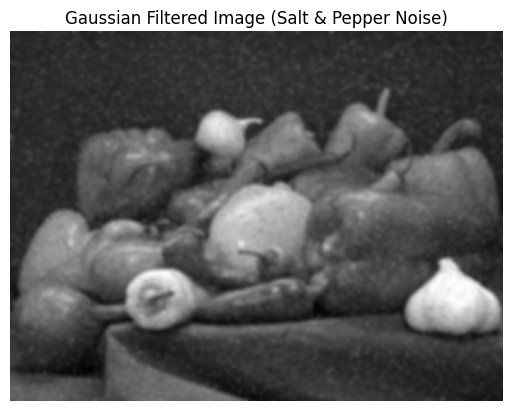

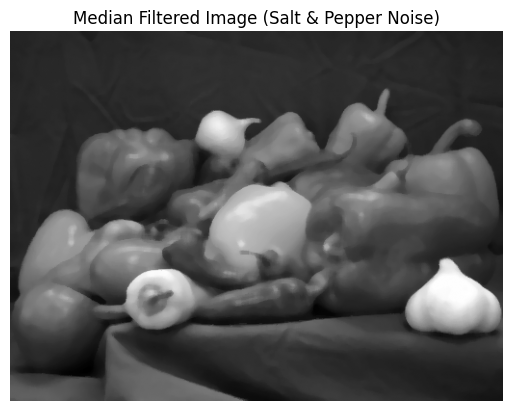

In [14]:
#Applying filters to the salt and pepper noise image
gaussian_filtered_salt = convolve2d_for_gray(img_saltandpepper_noise_peppers_grey, gauss_kernel)
median_filter = median_filter_gray(img_saltandpepper_noise_peppers_grey, size=7)

plt.imshow(gaussian_filtered_salt, cmap='gray')
plt.axis('off')
plt.title('Gaussian Filtered Image (Salt & Pepper Noise)')
plt.show()

plt.imshow(median_filter, cmap='gray')
plt.axis('off')
plt.title('Median Filtered Image (Salt & Pepper Noise)')
plt.show()

In [15]:
#Compare PSNR values
psnr_value_gaussian = psnr(img_peppers_grey, gaussian_filtered_salt, data_range=255)
psnr_value_box = psnr(img_peppers_grey, median_filter, data_range=255)

print(f'PSNR between original and Gaussian filtered image: {psnr_value_gaussian:.2f} dB')
print(f'PSNR between original and Median filtered image: {psnr_value_box:.2f} dB')


PSNR between original and Gaussian filtered image: 30.03 dB
PSNR between original and Median filtered image: 32.77 dB


# ***EXTRA*** 

## **My implementation** Bilateral filter

In [16]:
def bilateral_filter_gray(image, size=5, sigma_s=2, sigma_r=50):
   
    pad = size // 2
    padded = np.pad(image, pad, mode='edge')
    H, W = image.shape
    output = np.zeros_like(image, dtype=np.float32)
    
    # Precompute spatial Gaussian
    ax = np.arange(-pad, pad+1)
    xx, yy = np.meshgrid(ax, ax)
    spatial_weight = np.exp(-(xx**2 + yy**2)/(2*sigma_s**2))
    
    for i in range(H):
        for j in range(W):
            region = padded[i:i+size, j:j+size]
            intensity_diff = region - image[i,j]
            range_weight = np.exp(-(intensity_diff**2)/(2*sigma_r**2))

            weights = spatial_weight * range_weight

            output[i,j] = np.sum(weights * region) / np.sum(weights)
    
    return np.clip(output, 0, 255).astype(np.uint8)



## **Found on github**

In [17]:
def gaussian(x_square, sigma):
    return np.exp(-0.5*x_square/sigma**2)

def bilateral_filter(image, sigma_space, sigma_intensity):
    kernel_size = int(2*sigma_space+1)
    half_kernel_size = int(kernel_size/2)
    result = np.zeros(image.shape)
    W = np.ones(image.shape)

    for Px in range(half_kernel_size, image.shape[0] - half_kernel_size):
        for Py in range(half_kernel_size, image.shape[1] - half_kernel_size):

            for x in range(-half_kernel_size, half_kernel_size+1):
                for y in range(-half_kernel_size, half_kernel_size+1):
                    Gspace = gaussian(x ** 2 + y ** 2, sigma_space)

                    pixel_intensity_difference = image[Px,
                                                       Py] - image[Px+x, Py+y]
                    Gintensity = gaussian(
                        pixel_intensity_difference ** 2, sigma_intensity)

                    result[Px, Py] += Gspace * Gintensity * \
                        image[Px+x, Py+y]

                    W[Px, Py] += Gspace * Gintensity


    return result / W

## **Impementation of cv2**

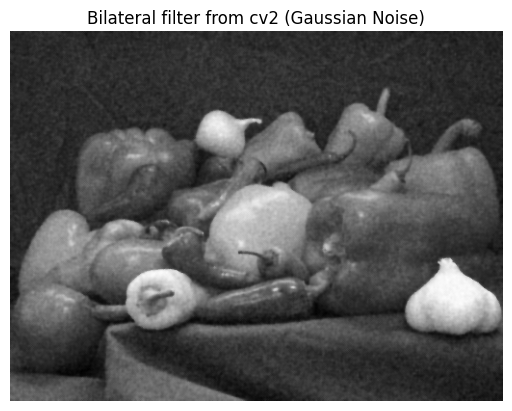

In [18]:
img_gaussian_noise_cv2 = cv2.bilateralFilter(img_gaussian_noise_peppers_grey, 5, 80, 2)
plt.imshow(img_gaussian_noise_cv2, cmap='gray')
plt.axis('off')
plt.title('Bilateral filter from cv2 (Gaussian Noise)')
plt.show()


In [19]:
bilateral_filter_gray_saltpepper = bilateral_filter_gray(img_saltandpepper_noise_peppers_grey, 5, 2, 80)

In [20]:
bilateral_filter_gray_gaussian = bilateral_filter_gray(img_gaussian_noise_peppers_grey, 5, 2, 80)

The github one takes some time 

In [21]:
bilateral_filter_gray_gauss_git = bilateral_filter(img_gaussian_noise_peppers_grey, 2, 80)

/tmp/ipykernel_45459/2527344820.py:17: RuntimeWarning: overflow encountered in scalar subtract
  pixel_intensity_difference = image[Px,


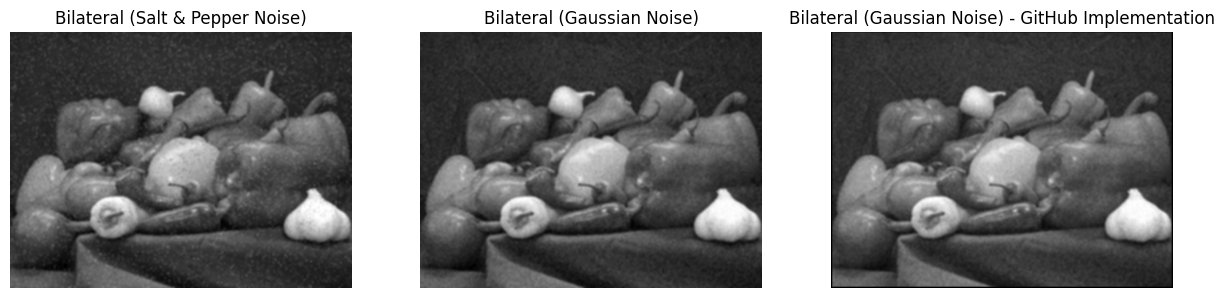

In [22]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(bilateral_filter_gray_saltpepper, cmap='gray')
plt.axis('off')
plt.title('Bilateral (Salt & Pepper Noise)') 

plt.subplot(1, 3, 2)
plt.imshow(bilateral_filter_gray_gaussian, cmap='gray')
plt.axis('off')
plt.title('Bilateral (Gaussian Noise)')

plt.subplot(1, 3, 3)
plt.imshow(bilateral_filter_gray_gauss_git, cmap='gray')
plt.axis('off')
plt.title('Bilateral (Gaussian Noise) - GitHub Implementation')

plt.show()

In [23]:
#Compare PSNR values
psnr_value_salt = psnr(img_peppers_grey, bilateral_filter_gray_saltpepper, data_range=255)
psnr_value_gaussian = psnr(img_peppers_grey, bilateral_filter_gray_gaussian, data_range=255)
psnr_value_gaussian_git = psnr(img_peppers_grey, bilateral_filter_gray_gauss_git, data_range=255)
psnr_value_cv2 = psnr(img_peppers_grey, img_gaussian_noise_cv2, data_range=255)

print(f'PSNR between original and Bilateral filtered (salt & pepper) image: {psnr_value_salt:.2f} dB')
print(f'PSNR between original and Bilateral filtered (gaussian) image: {psnr_value_gaussian:.2f} dB')
print(f'PSNR between original and Bilateral filtered (gaussian) image - GitHub Implementation: {psnr_value_gaussian_git:.2f} dB')
print(f'PSNR between original and Bilateral filtered (gaussian) image - cv2 Implementation: {psnr_value_cv2:.2f} dB')

PSNR between original and Bilateral filtered (salt & pepper) image: 30.28 dB
PSNR between original and Bilateral filtered (gaussian) image: 31.82 dB
PSNR between original and Bilateral filtered (gaussian) image - GitHub Implementation: 26.69 dB
PSNR between original and Bilateral filtered (gaussian) image - cv2 Implementation: 32.51 dB


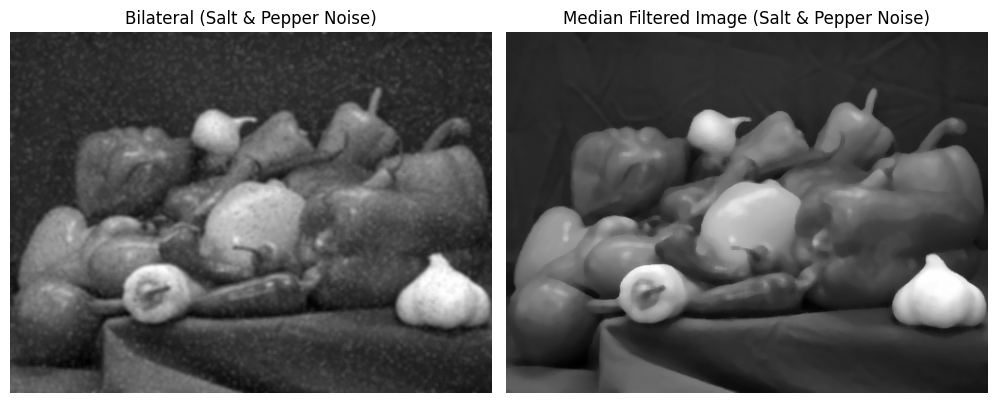

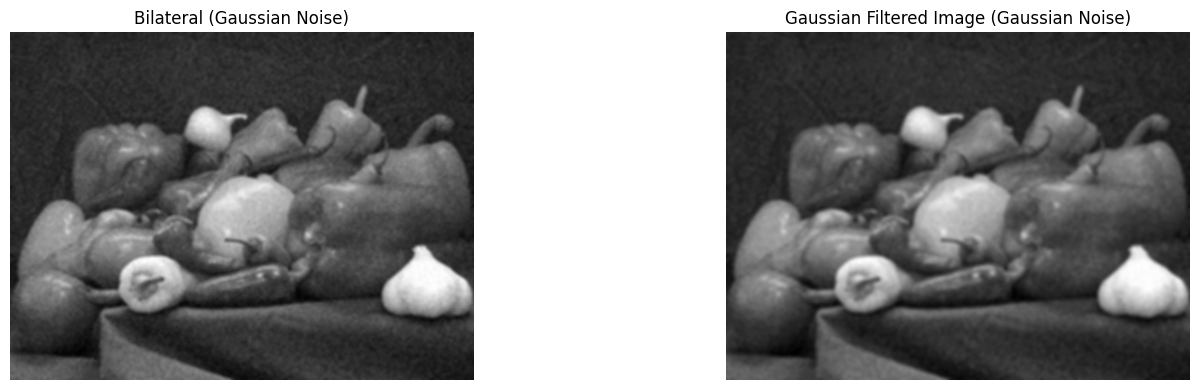

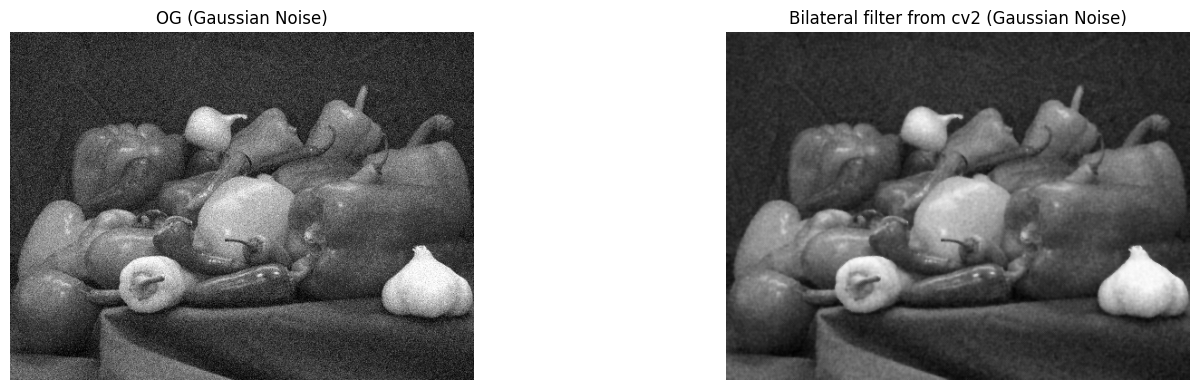

In [24]:
#Ploting the bests performing filters for each noise type compared to the bilateral filter
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(bilateral_filter_gray_saltpepper, cmap='gray')
plt.title('Bilateral (Salt & Pepper Noise)')
plt.axis('off')

# Bilateral Filtered (Gaussian)
plt.subplot(1, 4, 2)
plt.imshow(median_filter, cmap='gray')
plt.axis('off')
plt.title('Median Filtered Image (Salt & Pepper Noise)')

plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
plt.imshow(bilateral_filter_gray_gaussian, cmap='gray')
plt.title('Bilateral (Gaussian Noise)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gaussian_filtered, cmap='gray')
plt.axis('off')
plt.title('Gaussian Filtered Image (Gaussian Noise)')

plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
plt.imshow(img_gaussian_noise_peppers_grey, cmap='gray')
plt.axis('off')
plt.title('OG (Gaussian Noise)')

plt.subplot(1, 2, 2)
plt.imshow(img_gaussian_noise_cv2, cmap='gray')
plt.axis('off')
plt.title('Bilateral filter from cv2 (Gaussian Noise)')

plt.tight_layout()
plt.show()
